In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
data= pd.read_csv('USA_Housing.csv')


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


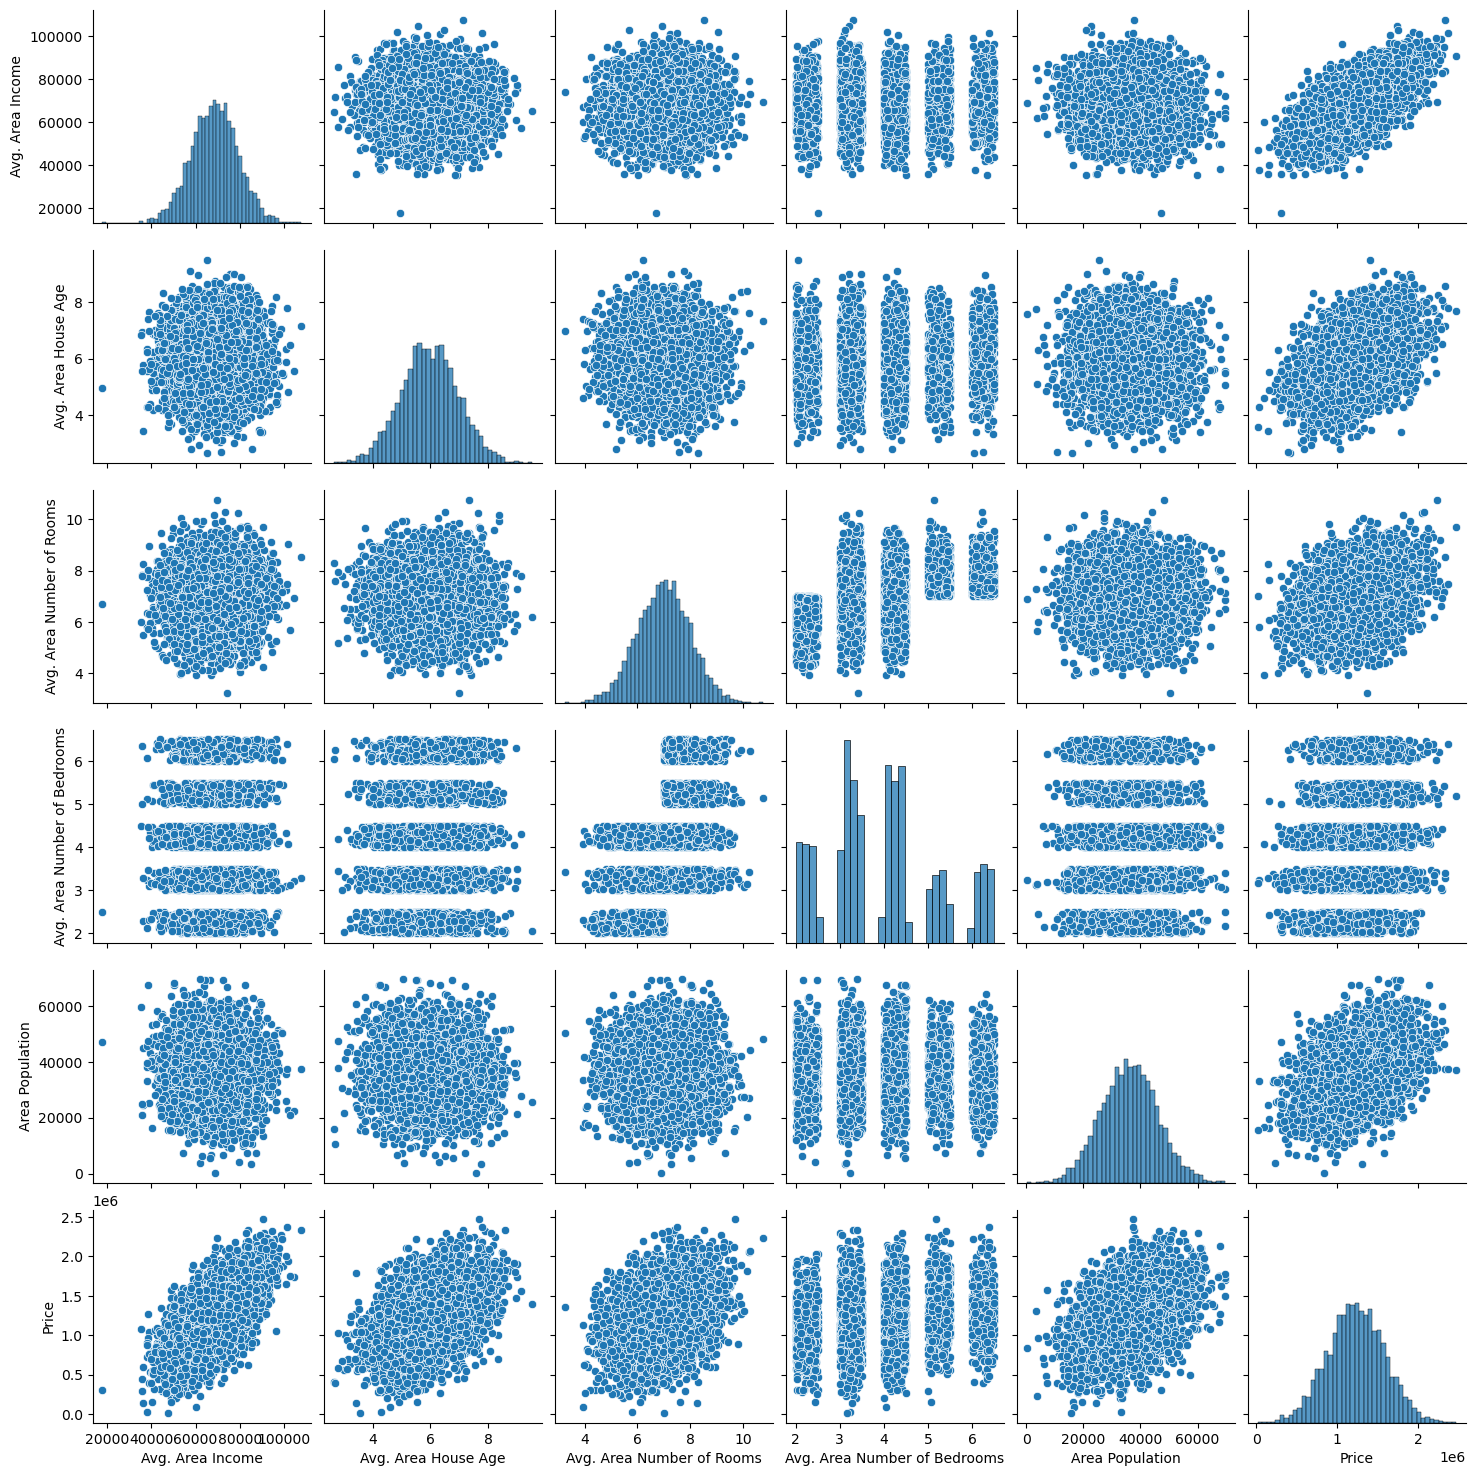

In [6]:
#EDA 
sns.pairplot(data)

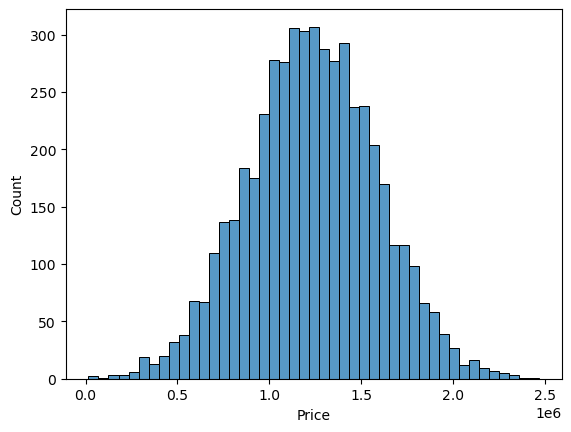

In [7]:
sns.histplot(x = data['Price']);


<Axes: xlabel='Avg. Area House Age', ylabel='Count'>

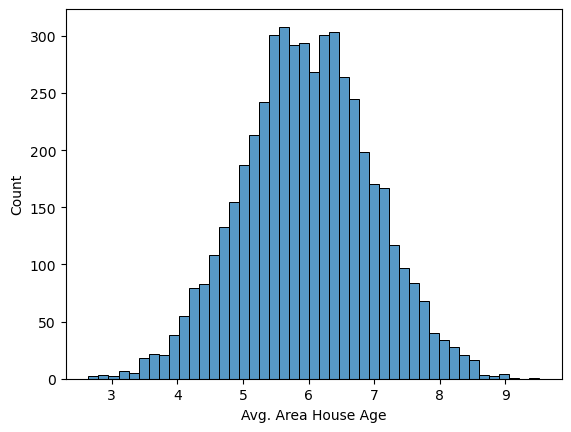

In [167]:
sns.histplot(x = data['Avg. Area House Age'])

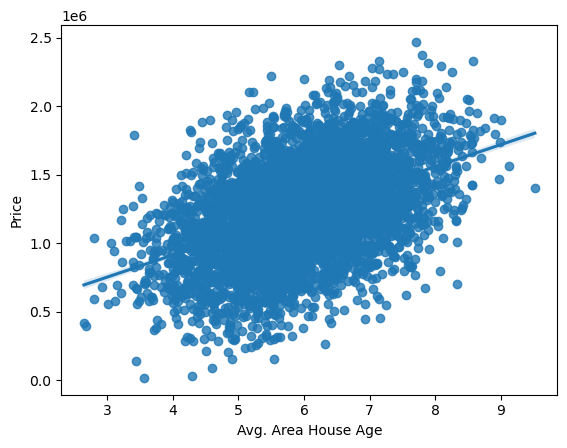

In [9]:
sns.regplot(x = data['Avg. Area House Age'], y = data['Price']);


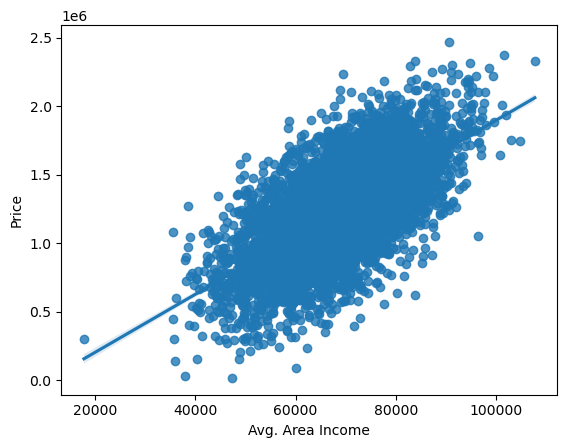

In [10]:
sns.regplot(x = data['Avg. Area Income'], y = data['Price']);

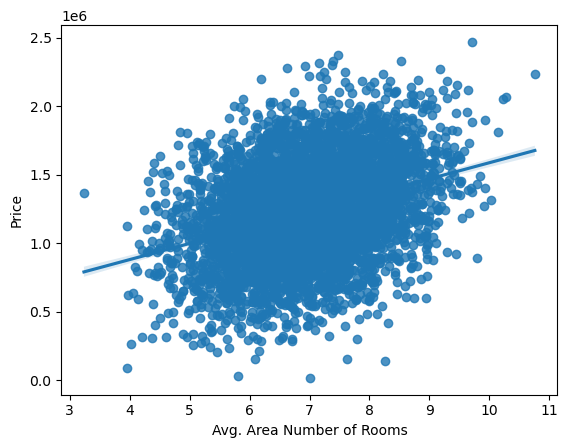

In [11]:
sns.regplot(x = data['Avg. Area Number of Rooms'], y = data['Price']);

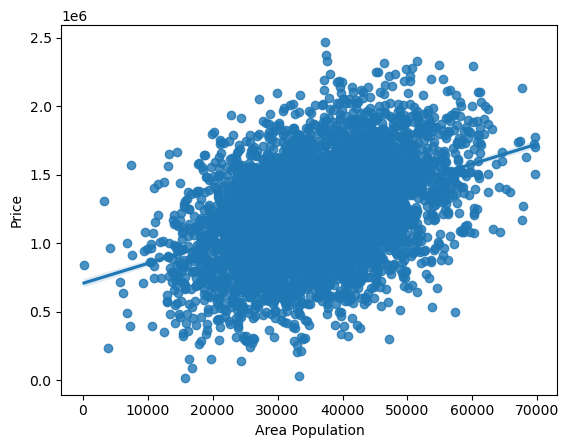

In [12]:
sns.regplot(x = data['Area Population'], y = data['Price']);

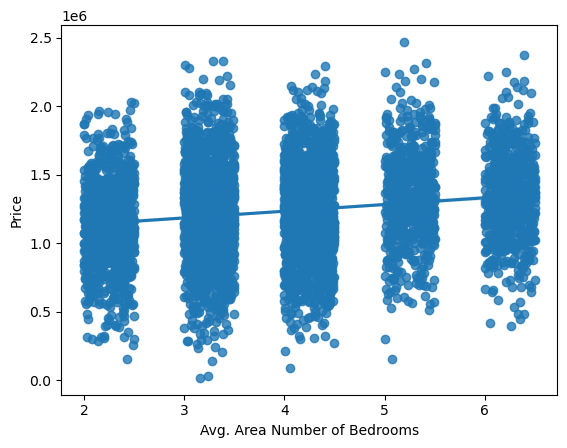

In [13]:
sns.regplot(x = data['Avg. Area Number of Bedrooms'], y = data['Price']);

<Axes: >

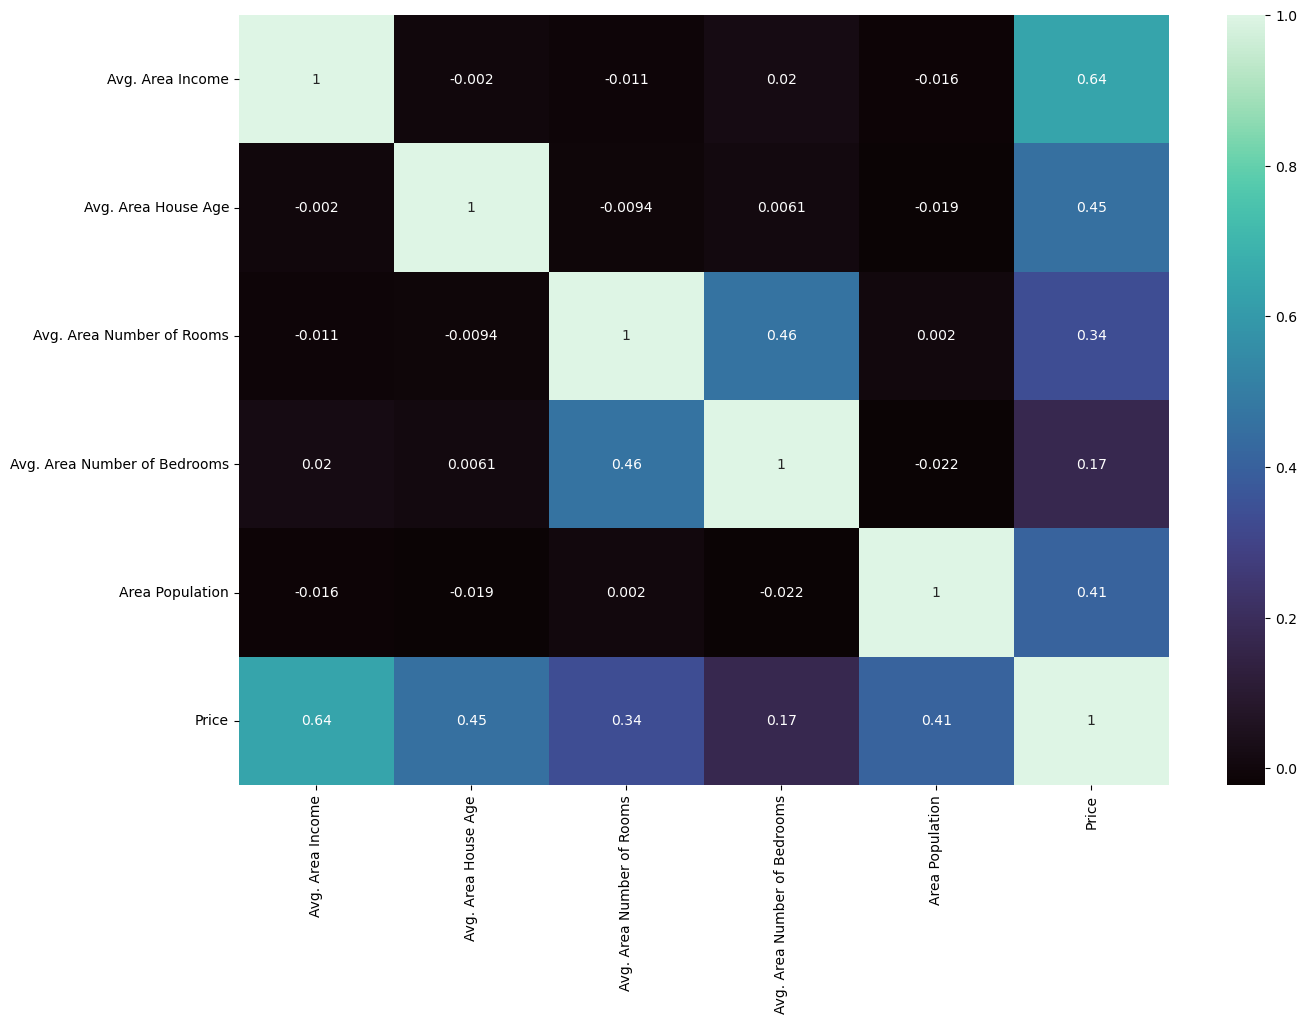

In [16]:
data=data.drop('Address',axis=1) 
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'mako')

In [17]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [20]:
X_train

array([[-0.19049241, -0.12817719, -0.13160635,  0.12038585, -0.82761782],
       [-1.38876401,  0.43080443,  0.80028487, -0.55648895,  1.15829878],
       [-0.35012392,  0.46680752,  1.70375078,  0.03067955, -0.31904298],
       ...,
       [-0.22335061,  0.53809182, -0.36489661, -0.68697084,  0.11908894],
       [-0.92417067,  1.43077434,  2.26846315,  0.2753331 ,  1.39018355],
       [-0.69357335, -0.07762332,  0.89219611,  1.67801341, -0.00681852]])

In [21]:
X_test

array([[-0.62396497,  1.05134233, -0.53493732, -0.59726454,  0.77509854],
       [-1.06752524,  0.92593776, -0.05804915, -0.69512596,  0.73880748],
       [ 0.14995479,  0.77674776, -0.31465336, -1.60849918, -0.69076777],
       ...,
       [ 1.16115701,  1.18417775,  0.25662849,  1.18870632,  0.93991305],
       [ 1.69832503,  0.56046124, -1.85607396, -1.54325824,  1.16585758],
       [-0.14145775, -1.04516314,  0.64633545,  0.8625016 , -0.40292631]])

In [22]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
pred=model.predict(X_test)

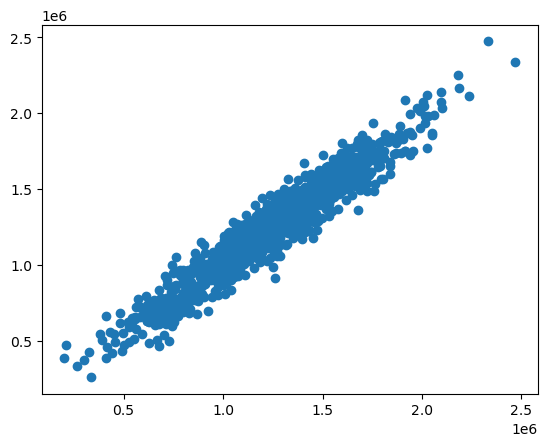

In [24]:
plt.scatter(y_test, pred)

In [25]:
model.score(X_test,y_test)

0.9179971706834331

In [26]:
from sklearn import metrics
r_squared = metrics.r2_score(y_test, pred)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-squared:', r_squared)


MAE: 80879.09723489442
MSE: 10089009300.893988
RMSE: 100444.0605555848
R-squared: 0.9179971706834331


In [108]:
# Decision Trees 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV , cross_val_score
x = data.drop(['Price'], axis = 1)
y = data.Price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

# Training
DTree_reg = DecisionTreeRegressor(random_state = 42)
DTree_reg.fit(x_train, y_train)

# Prediction
y_pred2 = DTree_reg.predict(x_test)

# Accuracy
accuracies = cross_val_score(estimator = DTree_reg, X = x_train, y = y_train, cv = 10)
print( accuracies)
print('Mean score: %0.3f'% accuracies.mean())
print('-------------------------------------------------------')

# Evaluation
from sklearn import metrics
r2_DTree = r2_score(y_test, y_pred2)
mae_DTree = metrics.mean_absolute_error(y_test, y_pred2)
mse_DTree = metrics.mean_squared_error(y_test, y_pred2)
rmse_DTree = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
print(' R2       :%0.2f' % r2_DTree)
print(' MAE      :%0.2f' % mae_DTree)
print(' MSE      :%0.2f' % mse_DTree)
print(' RMSE     :%0.2f' % rmse_DTree)


Kích thước của X_train: (3500, 5)
Kích thước của y_train: (3750, 5)
[0.75546155 0.76224059 0.74446849 0.76457296 0.73110896 0.7501891
 0.75477953 0.74711336 0.71223719 0.79072689]
Mean score: 0.751
-------------------------------------------------------
 R2       :0.76
 MAE      :137957.65
 MSE      :29576999659.65
 RMSE     :171979.65


In [78]:
#Knn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_data=scaler.fit_transform(data)
scaler_data
scaler_features=data.drop("Price",axis=1)
scaler_features
X_train, X_test, y_train, y_test = train_test_split(scaler_features,data['Price'],test_size=0.30)
from sklearn.neighbors import KNeighborsRegressor
mode3=KNeighborsRegressor(n_neighbors=1)
mode3.fit(X_train,y_train)
mode3.score(X_test,y_test)

0.15983163826529267

In [85]:
pred3=mode3.predict(X_test)

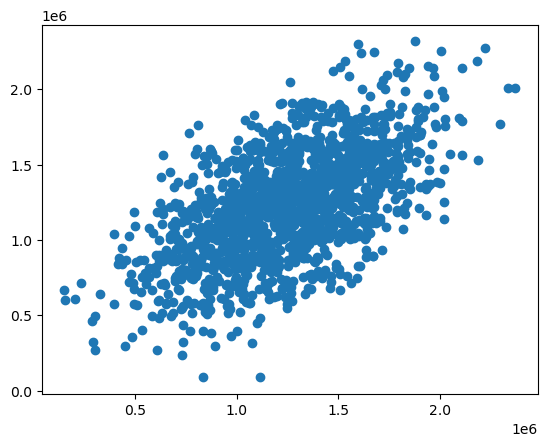

In [83]:
plt.scatter(y_test, pred3)

In [93]:

from sklearn import metrics
r2_DTree = r2_score(y_test,pred3)
mae_DTree = metrics.mean_absolute_error(y_test, pred3)
mse_DTree = metrics.mean_squared_error(y_test, pred3)
rmse_DTree = np.sqrt(metrics.mean_squared_error(y_test, pred3))
print(' R2       :%0.2f' % r2_DTree)
print(' MAE      :%0.2f' % mae_DTree)
print(' MSE      :%0.2f' % mse_DTree)
print(' RMSE     :%0.2f' % rmse_DTree)


 R2       :-1.06
 MAE      :407316.00
 MSE      :260617437194.63
 RMSE     :510507.04


In [92]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
Mode4=RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(scaler_features,data['Price'],test_size=0.30)
Mode4.fit(X_train,y_train)


RandomForestRegressor()

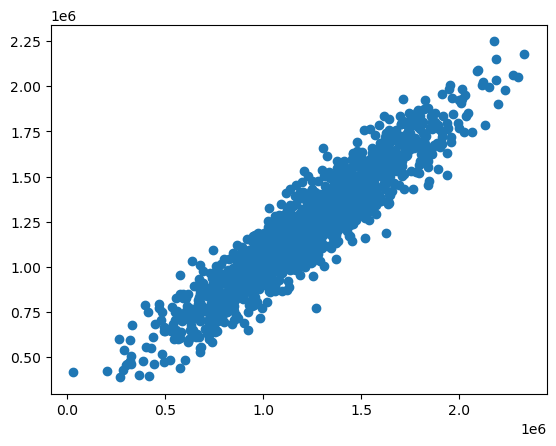

In [95]:
pred4=Mode4.predict(X_test)
plt.scatter(y_test,pred4)

In [96]:
Mode4.score(X_test,y_test)

0.8766587153617454

In [97]:
from sklearn import metrics
r2_DTree = r2_score(y_test,pred4)
mae_DTree = metrics.mean_absolute_error(y_test, pred4)
mse_DTree = metrics.mean_squared_error(y_test, pred4)
rmse_DTree = np.sqrt(metrics.mean_squared_error(y_test, pred4))
print(' R2       :%0.2f' % r2_DTree)
print(' MAE      :%0.2f' % mae_DTree)
print(' MSE      :%0.2f' % mse_DTree)
print(' RMSE     :%0.2f' % rmse_DTree)


 R2       :0.88
 MAE      :98575.84
 MSE      :15567916117.05
 RMSE     :124771.46


In [ ]:
# Splitting
x = data.drop(['Price'], axis = 1)
y = data.Price
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25, random_state = 101)

# Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

# Training
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf', C=1000, epsilon=0.001)
SVR_reg.fit(x_train, y_train)

# Predicting
y_pred3 = sc_y.inverse_transform(SVR_reg.predict(sc_x.transform(x_test)))

# Accuracy
accuracies = cross_val_score(estimator = SVR_reg, X = x_train, 
                             y = y_train, cv = 10)
print( accuracies)
print('Mean score: %0.3f'% accuracies.mean())
print('---------------------------------------------------------')

# Evaluation
r2_svr = r2_score(y_test, y_pred3)
mae_svr = mean_absolute_error(y_test, y_pred3)
mse_svr = metrics.mean_squared_error(y_test, y_pred3)
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
print(' R2       :%0.2f' % r2_svr)
print(' MAE      :%0.2f' % mae_svr)
print(' MSE      :%0.2f' % mse_svr)
print(' RMSE     :%0.2f' % rmse_svr)


